**Importing libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

**Reading Dataset**

In [2]:
path = 'dataset_sdn.csv'
df = pd.read_csv (path)
print(df)

           dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451       

In [3]:
df.shape

(104345, 23)

In [4]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [5]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [7]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


**Preprocessing Data and Cleaning**

In [8]:
to_drop = ['dt']
df = df.drop(to_drop, axis='columns')
df = df[df['pktrate'] !=0]

In [9]:
# Getting last two digits from src and dst
df['src'] = [int(i.split('.')[3]) for i in df['src']]
df['dst'] = [int(i.split('.')[3]) for i in df['dst']]
df['switch'] = df['switch'].astype(str) 
df['src'] = df['src'].astype(str)
df['dst'] = df['dst'].astype(str)
df['port_no'] = df['port_no'].astype(str)
df['Protocol'] = df['Protocol'].astype(str)
new_df = df

In [10]:
# checking for null values
df.isnull().sum()

switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        463
tot_kbps       463
label            0
dtype: int64

In [11]:
new_df.fillna(new_df.mean(), inplace=True)

C:\Users\alias\AppData\Local\Temp\ipykernel_9776\1150111414.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.fillna(new_df.mean(), inplace=True)


In [12]:
new_df

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,1943,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,1943,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104130,8,9,18,910,89180,931,540000000,9.320000e+11,5,3443,...,1,0,ICMP,2,5904,1702,0,0.0,0.0,0
104131,8,9,18,910,89180,931,540000000,9.320000e+11,5,3443,...,1,0,ICMP,1,134890224,2290,0,0.0,0.0,0
104342,3,11,5,31,3038,31,805000000,3.180500e+10,5,10,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,3,11,5,31,3038,31,805000000,3.180500e+10,5,10,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


**Applying OneHotEncoding**

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
print(df['Protocol'].value_counts())

UDP     31190
TCP     27527
ICMP    17292
Name: Protocol, dtype: int64


In [15]:
# apply OneHotEncoding
# Extract categorical variables
new_df = pd.get_dummies(df,columns = ['switch','src','Protocol','dst','port_no'])
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,...,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,...,0,0,0,1,0,0,0,1,0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,...,0,0,0,1,0,0,0,0,1,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,1,0,0,0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,1,0,0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104130,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,0,1,0,0,0
104131,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,1,0,0,0,0
104342,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,0,1,0,0,0
104343,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,1,0,0,0,0


**Preparing Training and Testing Sets**

In [16]:
x=new_df.drop(['label'],axis=1)
y=new_df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,...,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,...,0,0,0,1,0,0,0,1,0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,...,0,0,0,1,0,0,0,0,1,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,1,0,0,0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,1,0,0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104130,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,0,1,0,0,0
104131,910,89180,931,540000000,9.320000e+11,5,3443,30,2940,1,...,0,0,0,0,0,1,0,0,0,0
104342,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,0,1,0,0,0
104343,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,...,1,0,0,0,0,1,0,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

**Model Analysis Function**

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label',
           ylabel='True label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def show_confusion_matrix(model, data, label, pred_label):
    class_names = ['Normal', 'Attack']
    
    plot_confusion_matrix(label, pred_label, classes=class_names, normalize=True, cmap=plt.cm.Blues)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    print('\n')
    print(classification_report(label, pred_label))
    print(confusion_matrix(label, pred_label))
    print('\n')


**Classification**

We now train our ML models to predict whether the traffic is malicious (labelled as "1") or benign (labelled as "0").
For classification, we have used 7 different types of classifiers, viz. Gaussian Naive Bayes (GNB), Logistic Regression (LR), Support Vector Classifier (SVC), Ensemble Classifier (GBC), Decision Tree (DT), Artificial Neural Network (ANN) , Deep Learning (LSTM)

**Gaussian Naive Bayes(GNB)**

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
gnb = GaussianNB()

gnb.fit(x_train, y_train.values.ravel())
y_test_pred_gnb = gnb.predict(x_test)

In [22]:
print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))

Train score is: 0.7078625816106698
Test score is: 0.7132614129719774


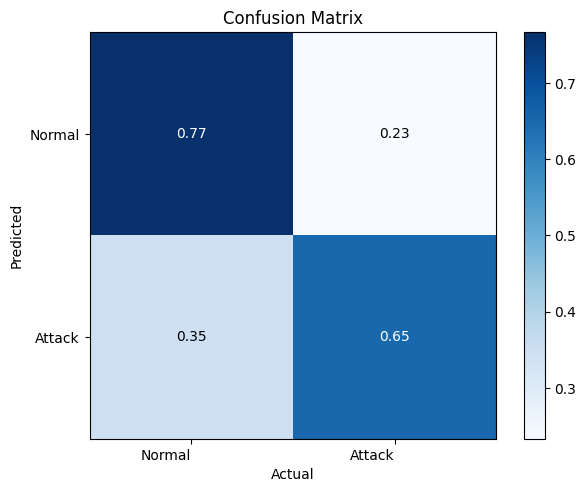



              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8035
           1       0.71      0.65      0.68      7167

    accuracy                           0.71     15202
   macro avg       0.71      0.71      0.71     15202
weighted avg       0.71      0.71      0.71     15202

[[6162 1873]
 [2486 4681]]




In [23]:
show_confusion_matrix(gnb,x_test,y_test,y_test_pred_gnb)

**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)

In [25]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.8402486555824165
Test score is: 0.8477831864228391


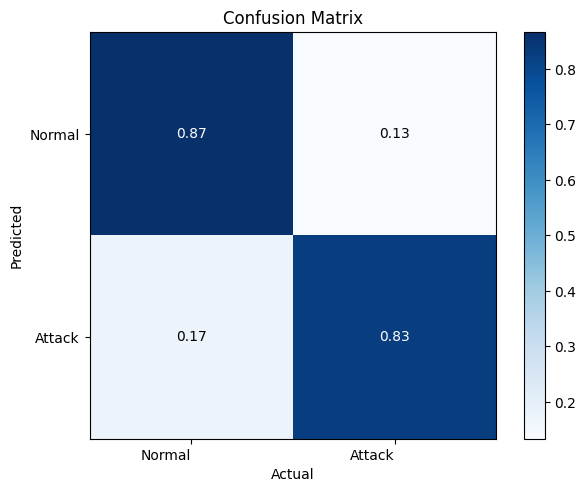



              precision    recall  f1-score   support

           0       0.85      0.87      0.86      8035
           1       0.85      0.83      0.84      7167

    accuracy                           0.85     15202
   macro avg       0.85      0.85      0.85     15202
weighted avg       0.85      0.85      0.85     15202

[[6965 1070]
 [1244 5923]]




In [26]:
show_confusion_matrix(lr,x_test,y_test,y_pred_lr)

**Support Vector Classifier (SVC)**

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_pred_svc = svc.predict(x_test)

In [29]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [30]:
print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))

Train score is: 0.9786373279392175
Test score is: 0.9762531245888699


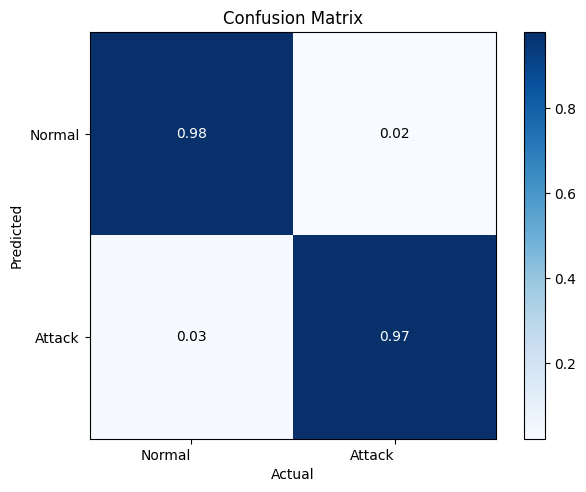



              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8035
           1       0.98      0.97      0.97      7167

    accuracy                           0.98     15202
   macro avg       0.98      0.98      0.98     15202
weighted avg       0.98      0.98      0.98     15202

[[7864  171]
 [ 190 6977]]




In [31]:
show_confusion_matrix(svc,x_test,y_test,y_pred_svc)

**Ensemble Classifier (GBC)**

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
  
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [33]:
y_pred_gbc = gbc.predict(x_test)

In [34]:
print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))

Train score is: 0.9968918052197938
Test score is: 0.996710959084331


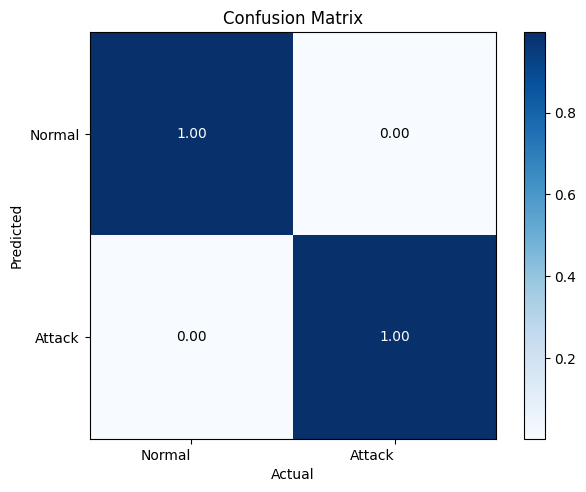



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202

[[8006   29]
 [  21 7146]]




In [35]:
show_confusion_matrix(gbc,x_test,y_test,y_pred_gbc)

**Decision Tree (DT)**

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [37]:
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]


# specify model
model = DecisionTreeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.839882,5.015171e-02,0.015628,8.344650e-07,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.999441,1.000000,0.999720,0.000280,2,1.000000,1.000000,1.000000,0.000000
1,0.187512,2.145767e-06,0.023485,7.765651e-03,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.741021,0.736704,0.738862,0.002159,11,0.736704,0.741021,0.738862,0.002159
2,0.281269,2.145767e-06,0.015628,2.384186e-07,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.866300,0.866493,0.866397,0.000096,9,0.866559,0.866300,0.866430,0.000129
3,0.359446,4.613400e-05,0.031255,1.907349e-06,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.885936,0.881755,0.883846,0.002090,7,0.885077,0.887087,0.886082,0.001005
4,0.437528,9.155273e-05,0.015627,2.384186e-06,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.927575,0.925369,0.926472,0.001103,6,0.925139,0.928167,0.926653,0.001514
5,0.499987,4.589558e-05,0.015628,7.152557e-07,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.956453,0.955136,0.955795,0.000659,4,0.955925,0.955762,0.955844,0.000082
6,0.625040,4.768372e-07,0.031257,2.503395e-06,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
7,0.195326,7.813096e-03,0.015628,2.145767e-06,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.741021,0.736704,0.738862,0.002159,11,0.736704,0.741021,0.738862,0.002159
8,0.296891,3.576279e-07,0.015627,1.311302e-06,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.851697,0.848304,0.850001,0.001696,10,0.848304,0.851697,0.850001,0.001696
9,0.390650,7.152557e-07,0.023442,7.811189e-03,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.875181,0.870572,0.872876,0.002304,8,0.870572,0.875181,0.872876,0.002304


In [38]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 1.0 corresponding to hyperparameters {'criterion': 'entropy', 'max_depth': None}


In [39]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred_dt = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_dt).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 0
Accuracy: 1.00


In [40]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
x.columns

[[8035    0]
 [   0 7167]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
       'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
       'port_no_4', 'port_no_5'],
      dtype='object')

In [41]:
# from sklearn import tree
# from IPython.display import Image, display
# import matplotlib.pyplot as plt, pydotplus
# from IPython.display import Image, display

# dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
#                                 feature_names=['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
#        'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
#        'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
#        'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
#        'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
#        'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
#        'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
#        'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
#        'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
#        'dst_17', 'dst_18', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6',
#        'dst_7', 'dst_8', 'dst_9', 'port_no_1', 'port_no_2', 'port_no_3',
#        'port_no_4', 'port_no_5'],  
#                                 class_names=['Malicious','Benign'])
# graph = pydotplus.graph_from_dot_data(dot_data)  
# display(Image(graph.create_png()))

**Artificial Neural Network (ANN)**

In [42]:
from keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
dense_1 = Dense(25,activation = 'tanh')
dense_2 = Dense(8,activation = 'selu')
dense_3 = Dense(25,activation = 'tanh')

inputs = Input(shape = (71,))
dense_x1 = dense_1(inputs)
dense_x2 = dense_2(dense_x1)
dense_x3 = dense_3(dense_x2)
outputs = Dense(1,activation = 'linear',name = 'reconstruction')(dense_x3)

model_ann = Model(inputs = inputs,outputs = outputs)


filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model_ann.compile(optimizer = 'adam',loss = 'mse',metrics = ['accuracy'],)
model_ann.summary()

history = model_ann.fit(x_train,y_train,epochs = 50,batch_size = 400,callbacks = callbacks_list,validation_data=(x_test, y_test),verbose=1) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 71)]              0         
                                                                 
 dense (Dense)               (None, 25)                1800      
                                                                 
 dense_1 (Dense)             (None, 8)                 208       
                                                                 
 dense_2 (Dense)             (None, 25)                225       
                                                                 
 reconstruction (Dense)      (None, 1)                 26        
                                                                 
Total params: 2,259
Trainable params: 2,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
147/153 [===========================>..] - ETA: 

Epoch 24/50
150/153 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9925
Epoch 24: val_accuracy improved from 0.99171 to 0.99329, saving model to best_weights.hdf5
153/153 [==============================] - 2s 12ms/step - loss: 0.0073 - accuracy: 0.9925 - val_loss: 0.0076 - val_accuracy: 0.9933
Epoch 25/50
151/153 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9932
Epoch 25: val_accuracy did not improve from 0.99329
153/153 [==============================] - 2s 10ms/step - loss: 0.0073 - accuracy: 0.9932 - val_loss: 0.0076 - val_accuracy: 0.9923
Epoch 26/50
149/153 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9934
Epoch 26: val_accuracy improved from 0.99329 to 0.99336, saving model to best_weights.hdf5
153/153 [==============================] - 2s 13ms/step - loss: 0.0067 - accuracy: 0.9934 - val_loss: 0.0071 - val_accuracy: 0.9934
Epoch 27/50
151/153 [============================>.] - ETA: 0s - loss: 0.0066 -

In [44]:
model_ann.evaluate(x_test,y_test)

476/476 [==============================] - 3s 7ms/step - loss: 0.0037 - accuracy: 0.9966


[0.0037227116990834475, 0.9966451525688171]

In [45]:
predict = model_ann.predict(x_test)
predict= np.round(predict)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

476/476 [==============================] - 3s 6ms/step
[[8010   25]
 [  26 7141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8035
           1       1.00      1.00      1.00      7167

    accuracy                           1.00     15202
   macro avg       1.00      1.00      1.00     15202
weighted avg       1.00      1.00      1.00     15202



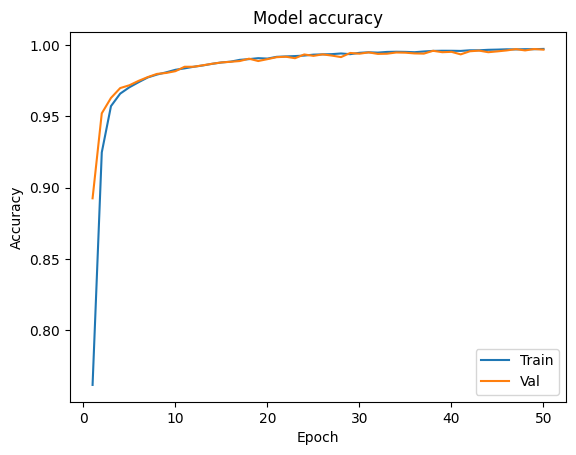

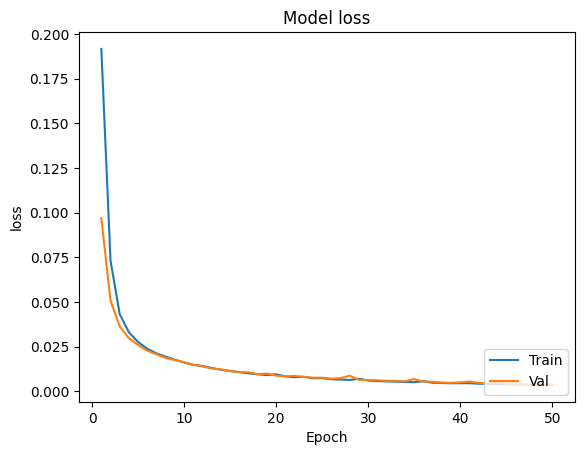

In [46]:
epochs=50
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['accuracy'])
    plt.plot(epochs_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

**Deep Learning - Long short-term memory (LSTM)**

In [47]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dropout, Activation

In [48]:
x_train=x_train.reshape(60807, 71, 1)
x_test=x_test.reshape(15202, 71, 1)

In [49]:
print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(71,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

Build model...


In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [51]:
history=model.fit(x_train, y_train, epochs = 20, batch_size=64,validation_data=(x_test, y_test),verbose=1)

Epoch 1/20
951/951 [==============================] - 109s 109ms/step - loss: 0.6278 - acc: 0.6290 - val_loss: 0.3774 - val_acc: 0.8396
Epoch 2/20
951/951 [==============================] - 102s 108ms/step - loss: 0.2978 - acc: 0.8849 - val_loss: 0.2391 - val_acc: 0.9123
Epoch 3/20
951/951 [==============================] - 101s 106ms/step - loss: 0.2214 - acc: 0.9158 - val_loss: 0.1749 - val_acc: 0.9303
Epoch 4/20
951/951 [==============================] - 103s 108ms/step - loss: 0.1755 - acc: 0.9308 - val_loss: 0.1543 - val_acc: 0.9418
Epoch 5/20
951/951 [==============================] - 102s 108ms/step - loss: 0.1405 - acc: 0.9454 - val_loss: 0.1147 - val_acc: 0.9558
Epoch 6/20
951/951 [==============================] - 107s 112ms/step - loss: 0.1321 - acc: 0.9500 - val_loss: 0.1092 - val_acc: 0.9583
Epoch 7/20
951/951 [==============================] - 104s 109ms/step - loss: 0.1116 - acc: 0.9574 - val_loss: 0.1036 - val_acc: 0.9594
Epoch 8/20
951/951 [============================

In [55]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

476/476 [==============================] - 13s 27ms/step - loss: 0.0238 - acc: 0.9899
Accuracy: 98.99%


In [56]:
y_pred = model.predict(x_test)
predict= np.round(y_pred)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

476/476 [==============================] - 13s 27ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8035
           1       0.99      0.99      0.99      7167

    accuracy                           0.99     15202
   macro avg       0.99      0.99      0.99     15202
weighted avg       0.99      0.99      0.99     15202



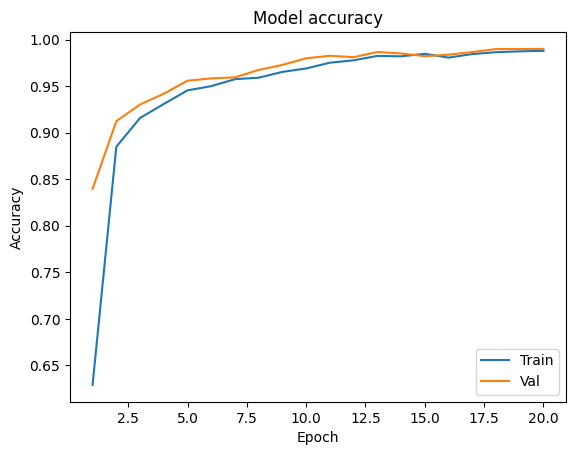

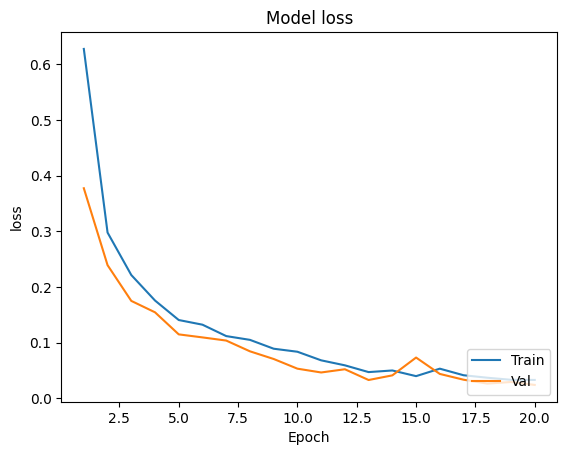

In [57]:
epochs=20
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

**Analysis**

In [58]:
from sklearn.metrics import roc_curve, auc

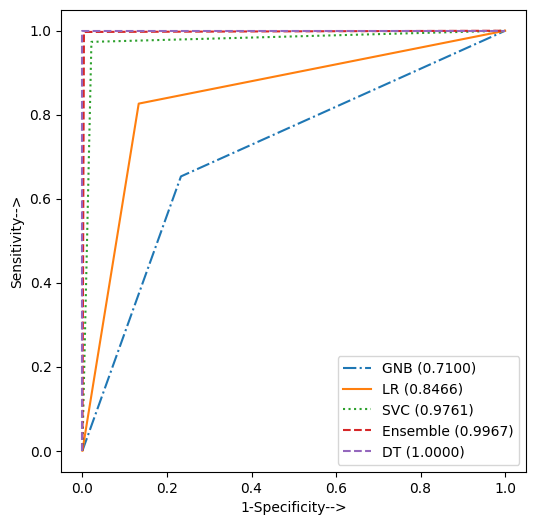

In [59]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_lr)
g_fpr, g_tpr, threshold2 = roc_curve(y_test, y_test_pred_gnb)
e_fpr, e_tpr, threshold3 = roc_curve(y_test, y_pred_gbc)
s_fpr, s_tpr, threshold4 = roc_curve(y_test, y_pred_svc)
d_fpr, d_tpr, threshold4 = roc_curve(y_test, y_pred_dt)


auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_e = auc(e_fpr, e_tpr)
auc_d = auc(d_fpr, d_tpr)


plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='GNB (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(e_fpr, e_tpr, linestyle='--', label='Ensemble (%.4f)' %auc_e)
plt.plot(d_fpr, d_tpr, linestyle='--', label='DT (%.4f)' %auc_d)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()